In [452]:
import os
import sys
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore');

In [453]:
df = pd.read_csv('agent_recruitment.csv')

In [454]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [456]:
df.Applicant_Marital_Status.unique()

array(['M', 'S', nan, 'W', 'D'], dtype=object)

In [457]:
df.Applicant_Occupation.unique()

array(['Others', 'Business', 'Salaried', 'Self Employed', 'Student', nan],
      dtype=object)

In [458]:
df.Applicant_Qualification.unique()

array(['Graduate', 'Class XII', 'Class X',
       'Masters of Business Administration', nan,
       'Associate/Fellow of Institute of Company Secretories of India',
       'Associate / Fellow of Institute of Chartered Accountans of India',
       'Others', 'Associate/Fellow of Insurance Institute of India',
       'Associate/Fellow of Acturial Society of India',
       'Certified Associateship of Indian Institute of Bankers',
       'Professional Qualification in Marketing'], dtype=object)

In [459]:
df.Manager_Joining_Designation.unique()

array(['Level 1', 'Level 2', nan, 'Other', 'Level 3', 'Level 7',
       'Level 5', 'Level 4', 'Level 6'], dtype=object)

In [460]:
df.Manager_Current_Designation.unique()

array(['Level 2', 'Level 1', 'Level 3', nan, 'Level 4', 'Level 5'],
      dtype=object)

In [461]:
df.Manager_Grade.unique()

array([ 3.,  2.,  4., nan,  5.,  6.,  1.,  9.,  7.,  8., 10.])

In [462]:
df.Manager_Status.unique()

array(['Confirmation', nan, 'Probation'], dtype=object)

In [463]:
df.Manager_Num_Application.unique()

array([ 2.,  0.,  5.,  1.,  3., nan,  4., 10.,  9.,  6., 13.,  8.,  7.,
       11., 12., 14., 16., 22.])

In [464]:
df.Manager_Num_Coded.unique()

array([ 1.,  0.,  4.,  3.,  2., nan,  5.,  7.,  6.,  8.,  9.])

In [465]:
df.Manager_Business.unique()

array([335249., 357184., 318356., ..., 409754., 418339., 316126.])

In [466]:
df.Manager_Num_Products.unique()

array([ 28.,  24.,  22.,  17.,  27.,   9.,  39.,  10.,  14.,  13.,  19.,
         7.,  20.,   1.,  30.,  nan,  15.,  18.,  16.,  23.,  21.,  11.,
         0.,  51.,  74.,  12.,  35.,  36.,   6.,   2.,   4.,   5.,   8.,
         3.,  33.,  25.,  59.,  66.,  32.,  29.,  26.,  31.,  45.,  46.,
        42.,  38.,  44.,  41.,  34., 101.,  37.,  60.,  43.,  48.,  47.,
        61.,  53.,  40.])

In [467]:
df.Manager_Business2.unique()

array([335249., 357184., 318356., ..., 409754., 418339., 305775.])

In [468]:
df.Manager_Num_Products2.unique()

array([ 28.,  24.,  22.,  17.,  27.,   9.,  39.,  10.,  14.,  13.,  19.,
         7.,  20.,   1.,  30.,  nan,  15.,  18.,  16.,  23.,  21.,  11.,
         0.,  51.,  74.,  12.,  35.,  36.,   6.,   2.,   4.,   5.,   8.,
         3.,  33.,  25.,  59.,  66.,  32.,  29.,  26.,  31.,  45.,  46.,
        42.,  38.,  44.,  41.,  34., 101.,  37.,  60.,  43.,  48.,  47.,
        61.,  53.,  40.])

In [469]:
df.Business_Sourced.unique()

array([0, 1], dtype=int64)

In [470]:
df.Manager_Num_Products.unique()

array([ 28.,  24.,  22.,  17.,  27.,   9.,  39.,  10.,  14.,  13.,  19.,
         7.,  20.,   1.,  30.,  nan,  15.,  18.,  16.,  23.,  21.,  11.,
         0.,  51.,  74.,  12.,  35.,  36.,   6.,   2.,   4.,   5.,   8.,
         3.,  33.,  25.,  59.,  66.,  32.,  29.,  26.,  31.,  45.,  46.,
        42.,  38.,  44.,  41.,  34., 101.,  37.,  60.,  43.,  48.,  47.,
        61.,  53.,  40.])

In [471]:
df.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [472]:
df = df.drop(columns = ['Office_PIN', 'Applicant_City_PIN'])

In [473]:
df.columns

Index(['ID', 'Application_Receipt_Date', 'Applicant_Gender',
       'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [474]:
df.dtypes

ID                              object
Application_Receipt_Date        object
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

## Typecasting (i)

In [475]:
df['Application_Receipt_Date']=pd.to_datetime(df['Application_Receipt_Date'])
df['Applicant_BirthDate']=pd.to_datetime(df['Applicant_BirthDate'])
df['Manager_DOJ']=pd.to_datetime(df['Manager_DOJ'])
df['Manager_DoB']=pd.to_datetime(df['Manager_DoB'])

In [476]:
df.dtypes

ID                                     object
Application_Receipt_Date       datetime64[ns]
Applicant_Gender                       object
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status               object
Applicant_Occupation                   object
Applicant_Qualification                object
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation            object
Manager_Current_Designation            object
Manager_Grade                         float64
Manager_Status                         object
Manager_Gender                         object
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2                 float64
Business_Sourced                        int64
dtype: object

### now calculating the age of applicant , manager age and manager experience

In [477]:
df['applicant_age'] = ((df['Application_Receipt_Date']-df['Applicant_BirthDate'])/np.timedelta64(1,'D'))/365
df['manager_age']=((df['Application_Receipt_Date']-df['Manager_DoB'])/np.timedelta64(1,'D'))/365
df['manager_exp']=((df['Application_Receipt_Date']-df['Manager_DOJ'])/np.timedelta64(1,'D'))/365

In [478]:
df = df.drop(columns = ['Application_Receipt_Date', 'Applicant_BirthDate','Manager_DOJ', 'Manager_DoB'])

In [479]:
df.dtypes

ID                              object
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
applicant_age                  float64
manager_age                    float64
manager_exp                    float64
dtype: object

## Missing value treatment

In [480]:
df.isnull().sum()

ID                                0
Applicant_Gender                 67
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
applicant_age                    73
manager_age                     683
manager_exp                     683
dtype: int64

In [481]:
#categorical
df["Applicant_Gender"].fillna("AG_Miss", inplace =True)
df["Applicant_Marital_Status"].fillna("AM_Miss", inplace = True)
df["Applicant_Occupation"].fillna("Others", inplace = True)
df["Applicant_Qualification"].fillna("Others", inplace =True)
df["Manager_Grade"].fillna("Others", inplace =True)
df["Manager_Status"].fillna("Others", inplace =True)
df["Manager_Gender"].fillna("MG_Miss", inplace =True)
df["Manager_Joining_Designation"].fillna("Other", inplace =True)
df["Manager_Current_Designation"].fillna("Others", inplace =True)

#numerical
df["Manager_Num_Application"].fillna("0", inplace =True)
df["Manager_Num_Coded"].fillna("0", inplace =True)
df["Manager_Business"].fillna(df['Manager_Business'].median(), inplace =True)
df["Manager_Num_Products"].fillna(df['Manager_Num_Products'].mode()[0], inplace =True)
df["Manager_Business2"].fillna(df['Manager_Business2'].median(), inplace =True)
df["Manager_Num_Products2"].fillna(df['Manager_Num_Products2'].mode()[0], inplace =True)

#numerical: age and Experinece

df['applicant_age'].fillna(df['applicant_age'].median(), inplace = True)
df['manager_age'].fillna(df['manager_age'].median(), inplace = True)
df['manager_exp'].fillna(df['manager_exp'].median(), inplace = True)

In [482]:
df.isnull().sum()

ID                             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
applicant_age                  0
manager_age                    0
manager_exp                    0
dtype: int64

In [483]:
df.dtypes

ID                              object
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                   object
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application         object
Manager_Num_Coded               object
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
applicant_age                  float64
manager_age                    float64
manager_exp                    float64
dtype: object

## typecasting (ii)

In [484]:
df['ID']=df['ID'].astype('category')
df['Applicant_Gender']=df['Applicant_Gender'].astype('category')
df['Applicant_Marital_Status']=df['Applicant_Marital_Status'].astype('category')
df['Applicant_Occupation']=df['Applicant_Occupation'].astype('category')
df['Applicant_Qualification']=df['Applicant_Qualification'].astype('category')

df['Manager_Joining_Designation']=df['Manager_Joining_Designation'].astype('category')
df['Manager_Current_Designation']=df['Manager_Current_Designation'].astype('category')
df['Manager_Grade']=df['Manager_Grade'].astype('category')
df['Manager_Status']=df['Manager_Status'].astype('category')
df['Manager_Gender']=df['Manager_Gender'].astype('category')
df['Manager_Num_Application']=df['Manager_Num_Application'].astype('float64')
df['Manager_Num_Coded']=df['Manager_Num_Coded'].astype('float64')

df['applicant_age']=df['applicant_age'].astype('float64')
df['manager_age']=df['manager_age'].astype('float64')
df['manager_exp']=df['manager_exp'].astype('float64')

In [485]:
df.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Business                float64
Manager_Num_Products            float64
Manager_Business2               float64
Manager_Num_Products2           float64
Business_Sourced                  int64
applicant_age                   float64
manager_age                     float64
manager_exp                     float64
dtype: object

In [486]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Manager_Num_Application,9527.0,1.800672,2.131576,0.000000,0.000000,1.000000,3.000000,2.200000e+01
Manager_Num_Coded,9527.0,0.704524,1.161856,0.000000,0.000000,0.000000,1.000000,9.000000e+00
Manager_Business,9527.0,178478.478325,265532.835247,-265289.000000,0.000000,102178.000000,232913.000000,3.578265e+06
Manager_Num_Products,9527.0,6.639551,8.337920,0.000000,0.000000,4.000000,11.000000,1.010000e+02
Manager_Business2,9527.0,177104.151149,262713.837405,-265289.000000,0.000000,101714.000000,231520.000000,3.578265e+06
Manager_Num_Products2,9527.0,6.620027,8.321917,0.000000,0.000000,4.000000,11.000000,1.010000e+02
Business_Sourced,9527.0,0.342920,0.474710,0.000000,0.000000,0.000000,1.000000,1.000000e+00
applicant_age,9527.0,32.591924,10.296357,15.449315,25.143836,30.035616,37.783562,7.741918e+01
manager_age,9527.0,34.595029,6.085579,20.789041,30.306849,33.739726,38.186301,5.805753e+01
manager_exp,9527.0,1.427355,1.678639,-0.027397,0.139726,0.765753,1.967123,7.194521e+00


In [487]:
3.578265e+06

3578265.0

### Final classification(grouping) : applicant age, manager age and manager experience.

In [488]:
df['applicant_age_range'] = 'str'
df['applicant_age_range'][(df['applicant_age'] <= 25)]= 'YA_Appl.'
df['applicant_age_range'][(df['applicant_age']> 25) & (df['applicant_age'] <= 50)]= 'AA_Appl.'
df['applicant_age_range'][(df['applicant_age']> 50)] = 'SA_Appli.'
df['applicant_age_range'] = df['applicant_age_range'].astype('category')
                          
                          
df['manager_age_range'] = 'str'
df['manager_age_range'][(df['manager_age']<= 35)]= 'YA_Man.'
df['manager_age_range'][(df['manager_age']> 35) & (df['manager_age']<= 50)]= 'AA_Man.'
df['manager_age_range'][(df['manager_age']> 50)] = 'SA_Man.'
df['manager_age_range'] = df['manager_age_range'].astype('category')

                          
df['manager_exp_range'] = 'str'
df['manager_exp_range'][(df['manager_exp']<= 2)]= 'New_Man.'
df['manager_exp_range'][(df['manager_exp']> 2) & (df['manager_exp']<= 5)]= 'SEN_Man'
df['manager_exp_range'][(df['manager_exp']> 5)] = 'Exe_Man'
df['manager_exp_range'] = df['manager_exp_range'].astype('category')
                        

df['Manager_business_range'] = 'str'
df['Manager_business_range'][(df['Manager_Business']<= 0)] = 'Loss'
df['Manager_business_range'][(df['Manager_Business']> 0) & (df['Manager_Business']<= 102178)]='Low'
df['Manager_business_range'][(df['Manager_Business']> 102178) & (df['Manager_Business']<= 232913)]='Medium'
df['Manager_business_range'][(df['Manager_Business']> 232913)] = 'High'  
df['Manager_business_range'] = df['Manager_business_range'].astype('category')                        
                        
df['Manager_business_range2'] = 'str'
df['Manager_business_range2'][(df['Manager_Business2']<= 0)] = 'Loss2'
df['Manager_business_range2'][(df['Manager_Business2']> 0) & (df['Manager_Business2']<= 102178)]='Low2'
df['Manager_business_range2'][(df['Manager_Business2']> 102178) & (df['Manager_Business2']<= 232913)]='Medium2'
df['Manager_business_range2'][(df['Manager_Business2']> 232913)] = 'High2' 
df['Manager_business_range2'] = df['Manager_business_range2'].astype('category')

In [489]:
df.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Business                float64
Manager_Num_Products            float64
Manager_Business2               float64
Manager_Num_Products2           float64
Business_Sourced                  int64
applicant_age                   float64
manager_age                     float64
manager_exp                     float64
applicant_age_range            category
manager_age_range              category
manager_exp_range              category
Manager_business_range         category
Manager_business_range2        category


## dropping: applicant age, manager age, manager exp, manager business, manager business 2

In [490]:
df = df.drop(columns = ['applicant_age','manager_age','manager_exp','Manager_Business','Manager_Business2'])

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID                           9527 non-null   category
 1   Applicant_Gender             9527 non-null   category
 2   Applicant_Marital_Status     9527 non-null   category
 3   Applicant_Occupation         9527 non-null   category
 4   Applicant_Qualification      9527 non-null   category
 5   Manager_Joining_Designation  9527 non-null   category
 6   Manager_Current_Designation  9527 non-null   category
 7   Manager_Grade                9527 non-null   category
 8   Manager_Status               9527 non-null   category
 9   Manager_Gender               9527 non-null   category
 10  Manager_Num_Application      9527 non-null   float64 
 11  Manager_Num_Coded            9527 non-null   float64 
 12  Manager_Num_Products         9527 non-null   float64 
 13  Man

## Now, here we go for Univariate , Bivariate and Multivariate Analysis

## Univariate Analysis

### Numerical variables

In [492]:
numerical = df.select_dtypes(include = ['int64', 'float64'])
numerical.dtypes

Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Num_Products       float64
Manager_Num_Products2      float64
Business_Sourced             int64
dtype: object

In [493]:
for i in numerical.columns:
    print(f'range of {i}:[{df[i].min()}, {df[i].max()}]')

range of Manager_Num_Application:[0.0, 22.0]
range of Manager_Num_Coded:[0.0, 9.0]
range of Manager_Num_Products:[0.0, 101.0]
range of Manager_Num_Products2:[0.0, 101.0]
range of Business_Sourced:[0, 1]


In [494]:
group1 = ['Manager_Num_Application', 'Manager_Num_Coded']
group2 = ['Manager_Num_Products', 'Manager_Num_Products2']
group3 = ['Business_Sourced']

In [495]:
#KDE Plot
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    
    
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)
                                                                                    
                                                                                        ))

<Figure size 720x720 with 0 Axes>

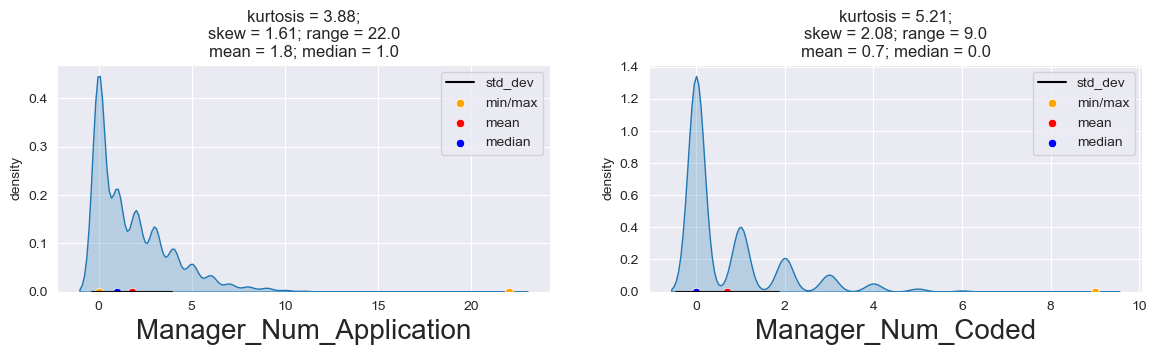

In [496]:
plt.figure(figsize = (10,10))
UVA_KDE(df,group1);

<Figure size 720x720 with 0 Axes>

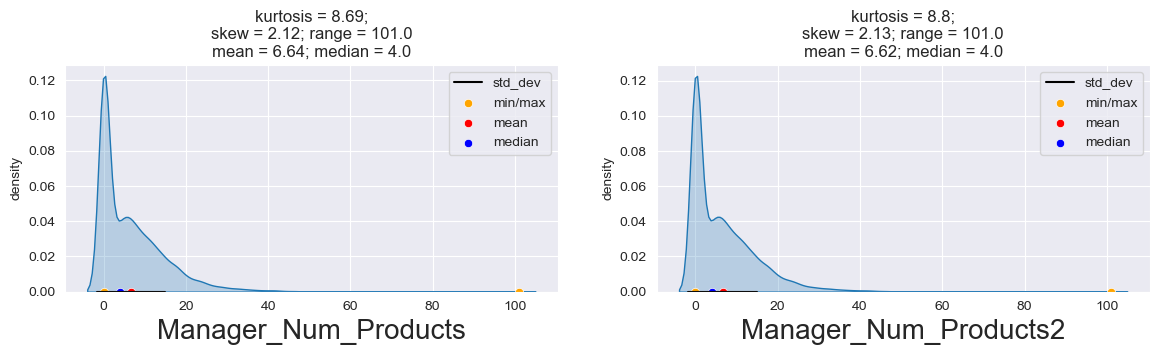

In [497]:
plt.figure(figsize = (10,10))
UVA_KDE(df,group2);

<Figure size 720x720 with 0 Axes>

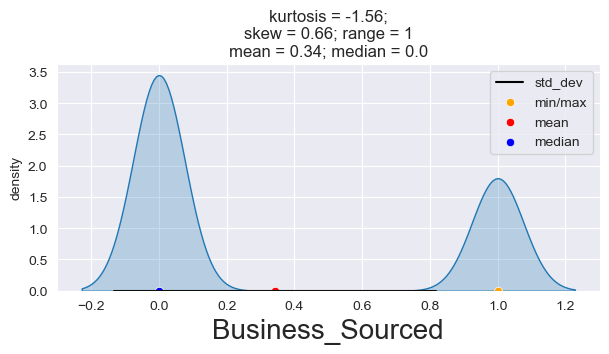

In [498]:
plt.figure(figsize = (10,10))
UVA_KDE(df,group3);

## categorical variables

In [499]:
df.select_dtypes(include = [ 'category']).dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
applicant_age_range            category
manager_age_range              category
manager_exp_range              category
Manager_business_range         category
Manager_business_range2        category
dtype: object

In [500]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

<Figure size 720x720 with 0 Axes>

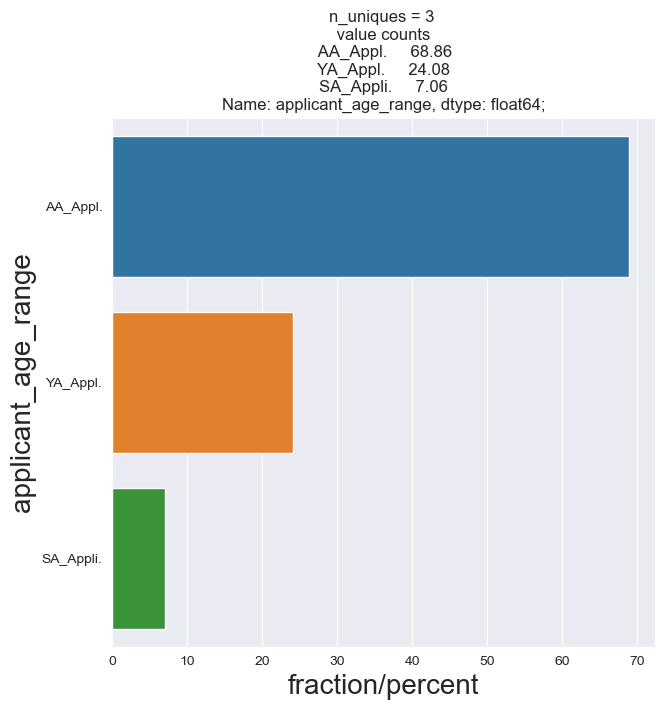

In [501]:
plt.figure(figsize = (10,10))
UVA_category(df, ['applicant_age_range']);

### Result:
* Young age group : less than 25 years; Adult age group : between 25 and 50 and Senior Age Group : >50 years
* Nearly 69% of the applicant are of the age group 25 and 50
* Nearly 24% of the applicant are of age less than 25
* Applicant of age greater than 50 are just 7% 

<Figure size 720x720 with 0 Axes>

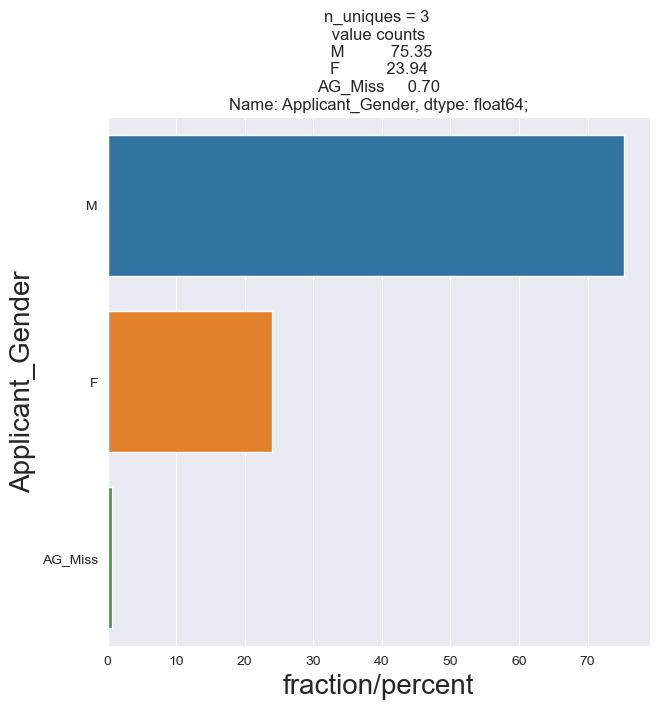

In [502]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Applicant_Gender']);

### Result:
* 75% of the applicants are Male and just 24% of the applicant are Female
* 0.70% of the applicnats gender is missing it may be either they haven't opted.

<Figure size 720x720 with 0 Axes>

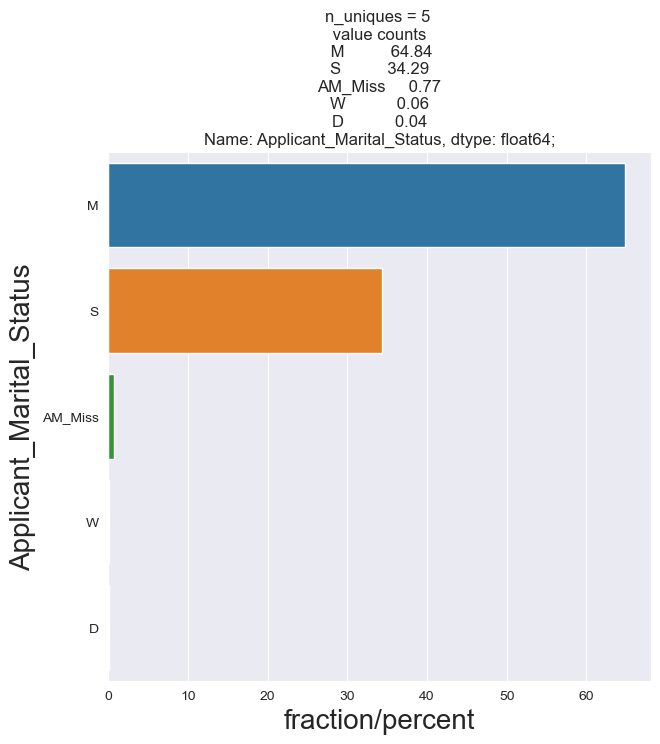

In [503]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Applicant_Marital_Status']);

### Result:
* For the applicant martial status we have the 4 values Married, Single, Widow, Divorce and in some applicant these values are missing
* Nearly 65% of the total applicant are married
* 34 % are single
* The applicant who are either Divorced, Widow or the records are missing are very low in number they are approx less than 1%

<Figure size 720x720 with 0 Axes>

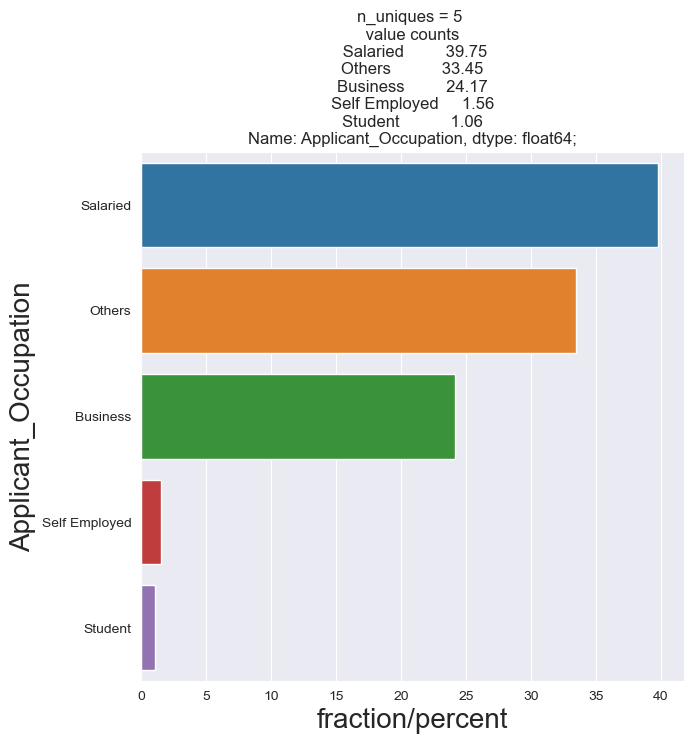

In [504]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Applicant_Occupation']);

### Result:
* Applicants are either Salaried, have Business, self employed, student and some applicant didn't mention the details
* Nearly 40% of the applicant are salaried
* 24% have their business
* Nearly 1.5% are Self-Employed
* 1% are Student
* Nearly 33.5 % of the applicnat choosen other i.e. they didn't belongs to salaried, business, student and self employeed group

<Figure size 720x720 with 0 Axes>

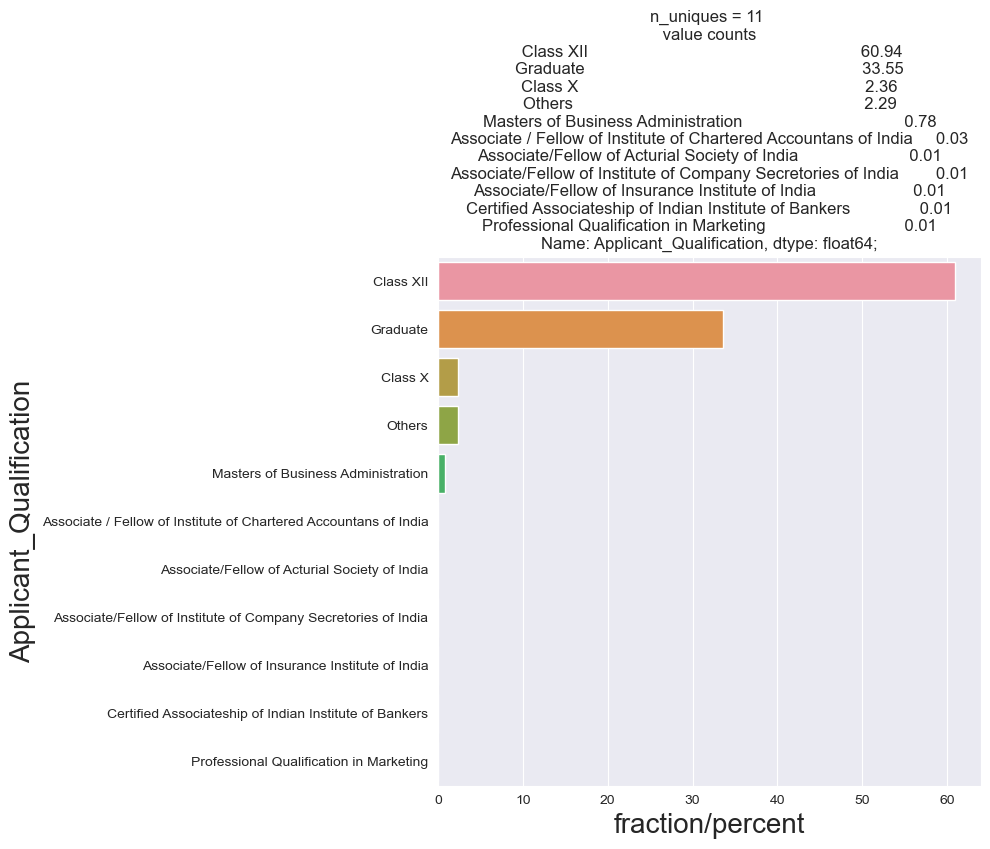

In [505]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Applicant_Qualification']);

### Result: Academic Qualification:
* Only 2.3% of the applicants are 10th passed
* Approx 61% of the appliocants are 12th passed
* Approx 33.5% are graduates
* Less than 1% applicant have done higher studies
* Approx 2% applicnat have done some other courses or studied less than 10 class

<Figure size 720x720 with 0 Axes>

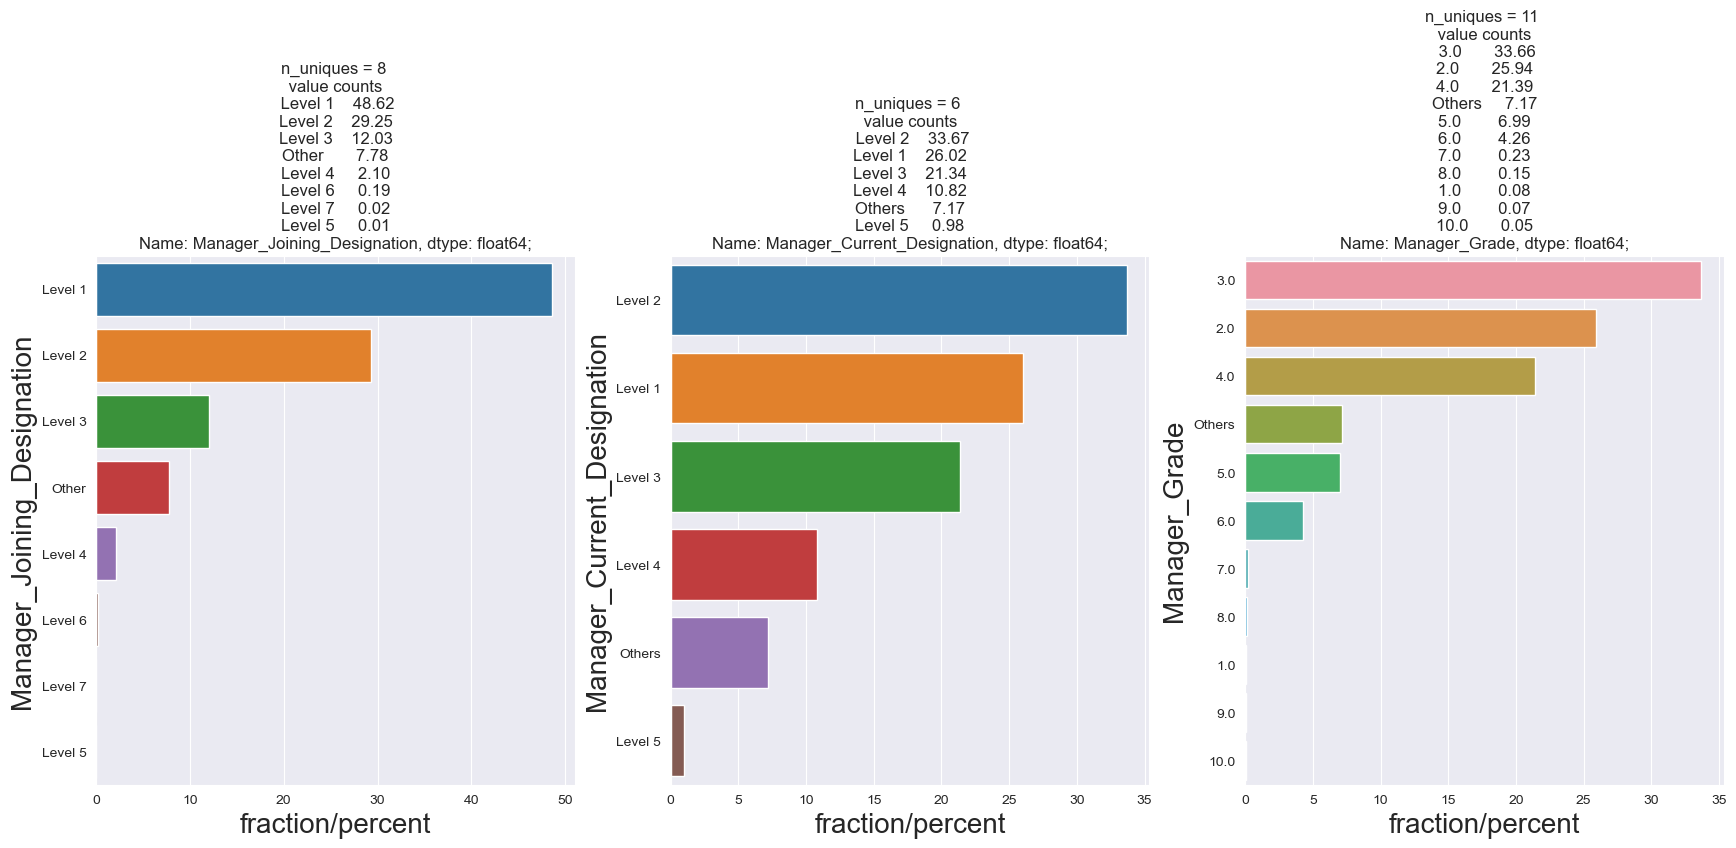

In [506]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Manager_Joining_Designation', 'Manager_Current_Designation','Manager_Grade' ]);

### About Managers (Joining Designation/ Current Designation/Manager Grade)
* Managers Joining Designations are classified into 8 levels
* Managers Current Designations are classified into 6 levels
* Managers grade are listed into 11 groups
* Nearly 49% of Managers Joined at Level-1 managers, 29% joined on Level 2 managers, 12% joined on Level 3 manager less than 8% Joined on level 4, 5,6 and other
* Currently  34% of the managers are  level 2 managers, 26% are Level 1 managers, 21% are Level 3 and 11% are level 4 managers and remeaing are of level 5 and others
* Nearly 33.7% are grade 3 managers, 26% are grade 2 managers, 21% are grade 4 managers and remaing 20% are grade 1, 5,6,7,8,9 and other grade managers

<Figure size 720x720 with 0 Axes>

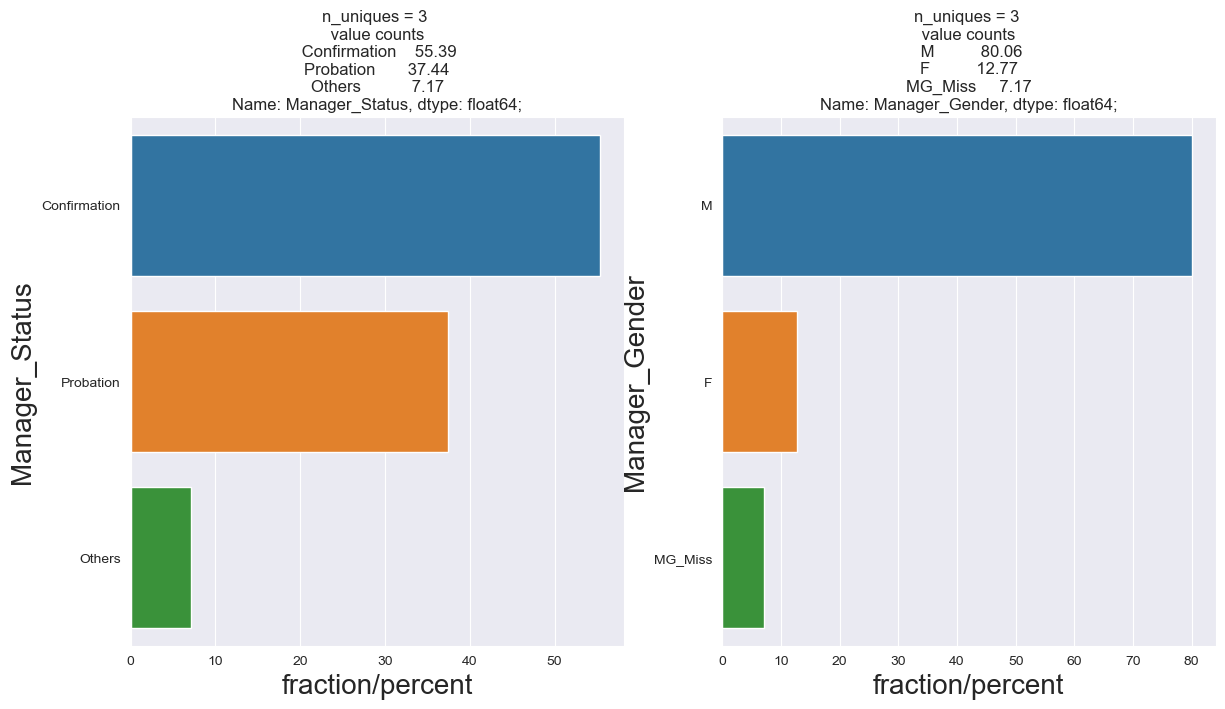

In [507]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Manager_Status', 'Manager_Gender', ]);

### Result(Manager Status/Gender):
* Nearly 55.39% are confirmed managers
* Nearly 37% are on probabtion
* Nearly 80% of the managers are Male
* Nearly 13% of the managers are Female

<Figure size 720x720 with 0 Axes>

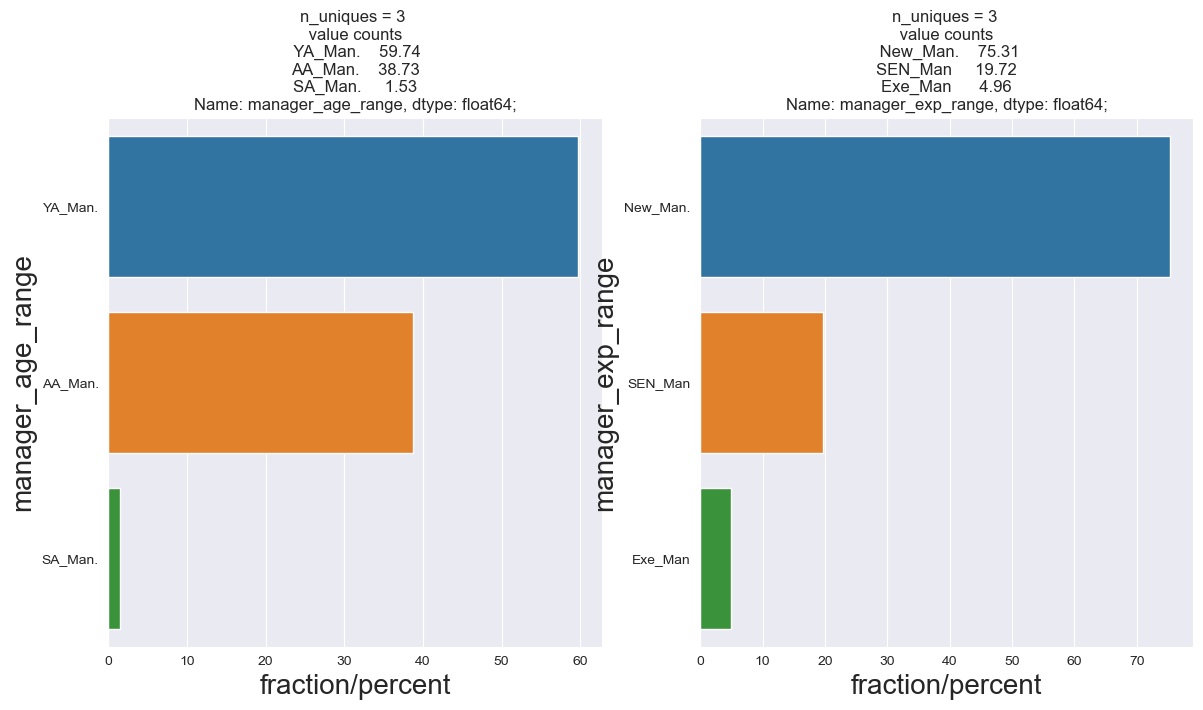

In [508]:
plt.figure(figsize = (10,10))
UVA_category(df, ['manager_age_range', 'manager_exp_range', ]);

### Result( Manager Age Range/ Experience Range):
* Manager Age Range : <= 35- Young age manager, between 35 & 50 - Adult age manager, and >50 - Senior Age Manager
* Manager Exp Range : <=2years -New MAnager, between 2 & 5-Senior Manager and > 5 years Executive Manager
* Nearly 60% are young Manager, 39% are Adult age manager and only 1.5% are senior age manager
* Nearly 75% new managers, 20% are Senior Manager and only 5% are executive managers

<Figure size 720x720 with 0 Axes>

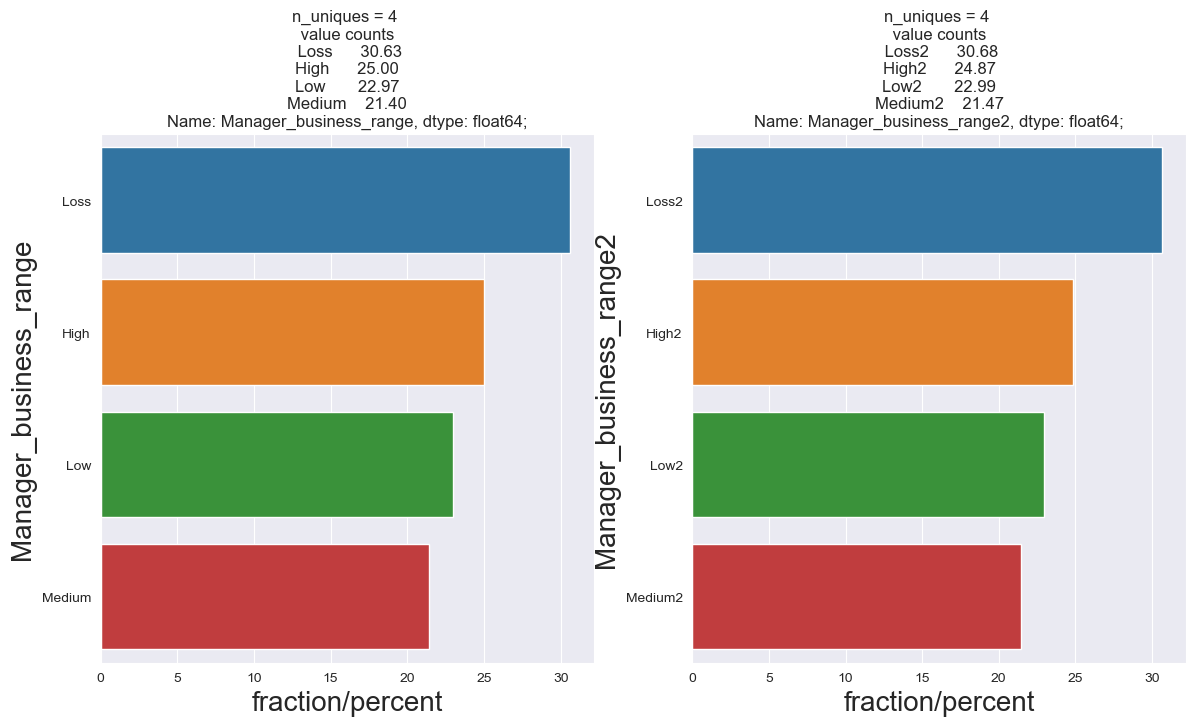

In [509]:
plt.figure(figsize = (10,10))
UVA_category(df, ['Manager_business_range', 'Manager_business_range2', ]);

### Result(Manager Business 1 and 2):
* loss : < 0,
* Low : between 0 and 102178
* Medium : between 102178 and 232913
* High : >232913

#### Business 1 :


In [510]:
df['Business_Sourced'] = df['Business_Sourced'].astype('category')

## Bivariate Analysis

### Numerical - Numerical

In [511]:
numerical = df.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Num_Products       float64
Manager_Num_Products2      float64
dtype: object

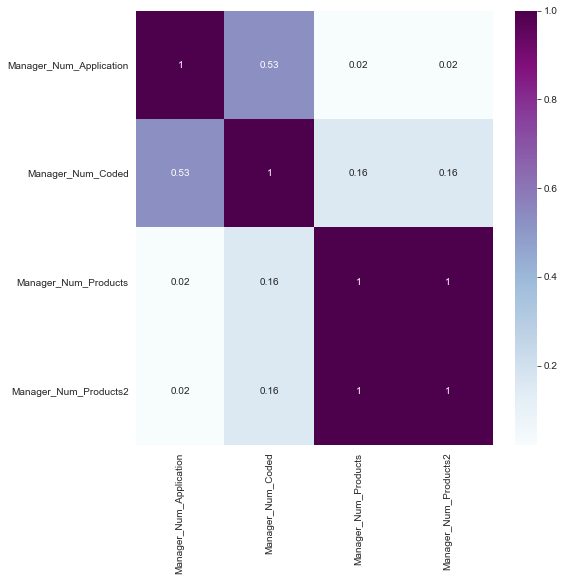

In [512]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

## Result:
* from the above reslt there is a high correlation between Manager Num application and Manager Num Coded i.e. Managers who have greater number of application have recruited greater number of agents.
* there is a significantly less correlation between  

<Figure size 1296x720 with 0 Axes>

<Figure size 840x560 with 0 Axes>

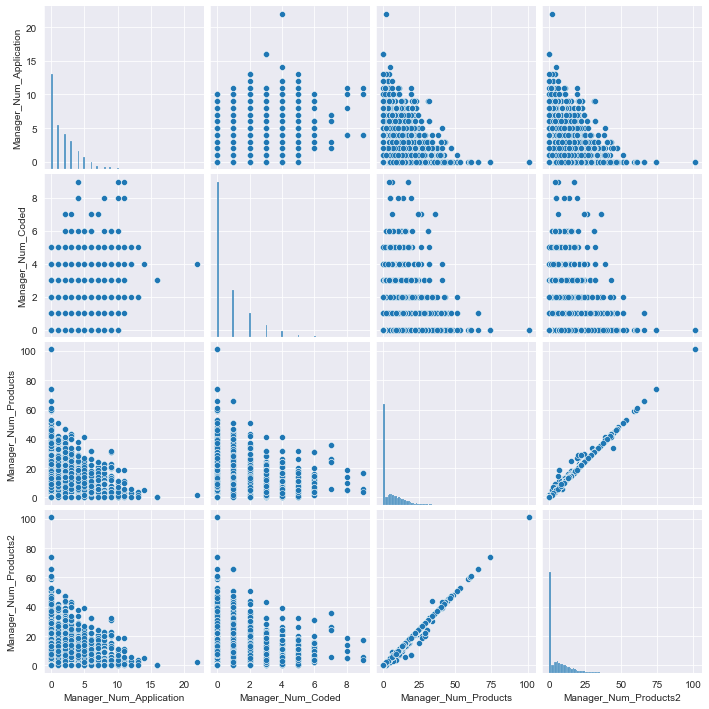

In [513]:
plt.figure(figsize = (18,10))
plt.figure(dpi=140)
sns.pairplot(data = df)

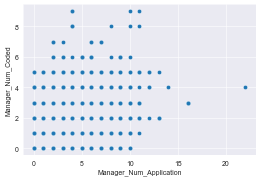

In [514]:
plt.figure(dpi=50)
sns.scatterplot(numerical['Manager_Num_Application'], numerical['Manager_Num_Coded']);

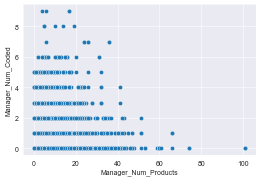

In [515]:
plt.figure(dpi=50)
sns.scatterplot(numerical['Manager_Num_Products'], numerical['Manager_Num_Coded']);

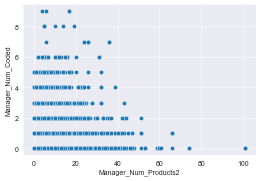

In [516]:
plt.figure(dpi=50)
sns.scatterplot(numerical['Manager_Num_Products2'], numerical['Manager_Num_Coded']);

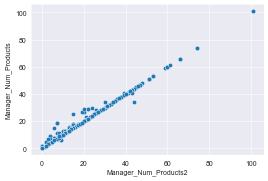

In [517]:
plt.figure(dpi=50)
sns.scatterplot(numerical['Manager_Num_Products2'], numerical['Manager_Num_Products']);

### Categorical - Categorical

In [518]:
df.select_dtypes(include = [ 'category']).dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Business_Sourced               category
applicant_age_range            category
manager_age_range              category
manager_exp_range              category
Manager_business_range         category
Manager_business_range2        category
dtype: object

In [519]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

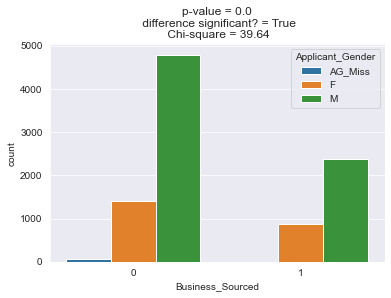

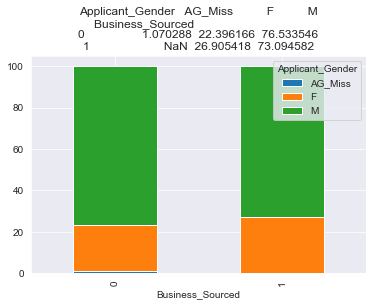

In [520]:
BVA_categorical_plot(df, 'Applicant_Gender', 'Business_Sourced')

### Result: 
* From the p_value and Chi-square test we can assume difference between males and females to be agents is significant
* From the frequency we can assume Males are more likely to be agents as comparison to the females.

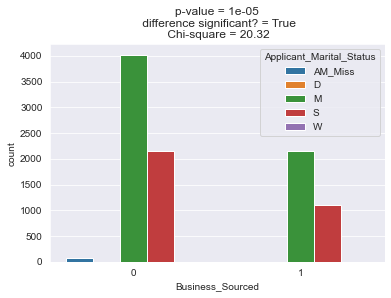

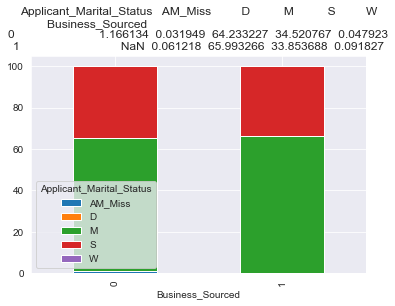

In [521]:
BVA_categorical_plot(df, 'Applicant_Marital_Status', 'Business_Sourced')

### Result:
* Nearly 66 % Married Applicants are more likely to be agents

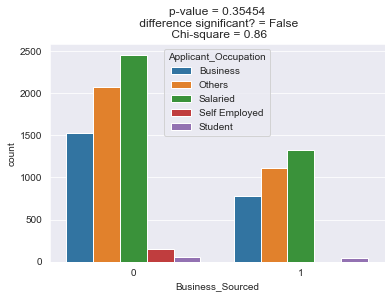

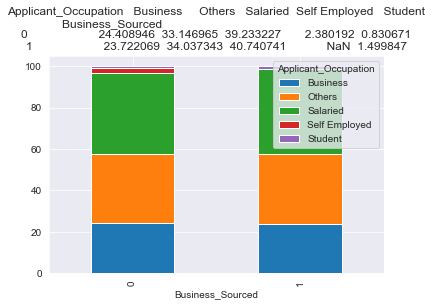

In [522]:
BVA_categorical_plot(df, 'Applicant_Occupation', 'Business_Sourced')

### Result:
* Nearly 41% of the Applicant who are salaried and 24% of the applicants who have their own business are more likely to be agents

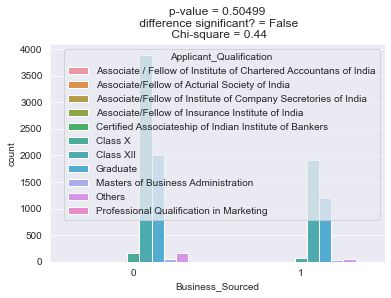

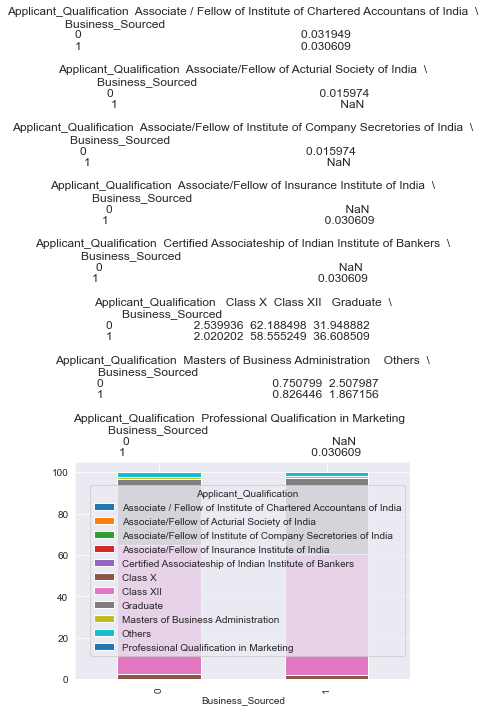

In [523]:
BVA_categorical_plot(df, 'Applicant_Qualification', 'Business_Sourced')

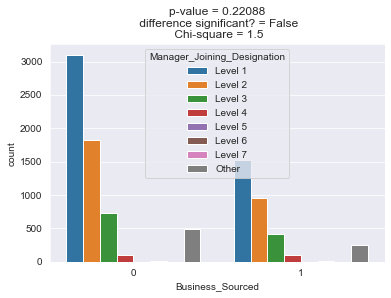

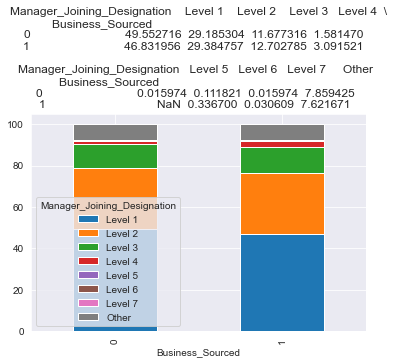

In [524]:
BVA_categorical_plot(df, 'Manager_Joining_Designation', 'Business_Sourced')

### Result:
* Managers who joined as the level 1 managers are more likely to convert the applicant to agents as compared to thers

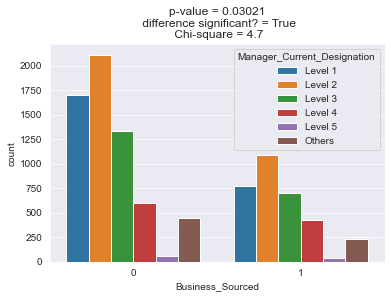

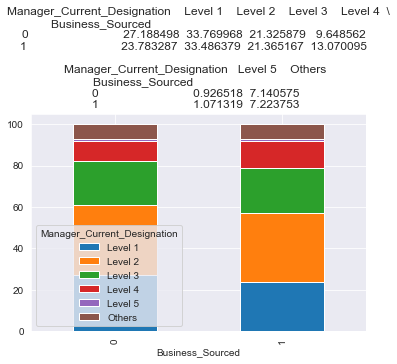

In [525]:
BVA_categorical_plot(df, 'Manager_Current_Designation', 'Business_Sourced')

### Result:
* managers whose current designation is level 2 are more likely to convert applicant into agents then others

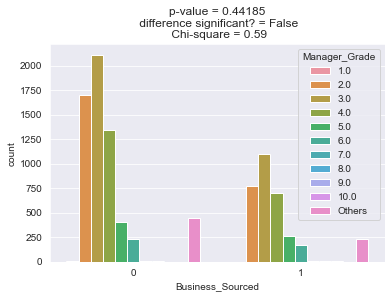

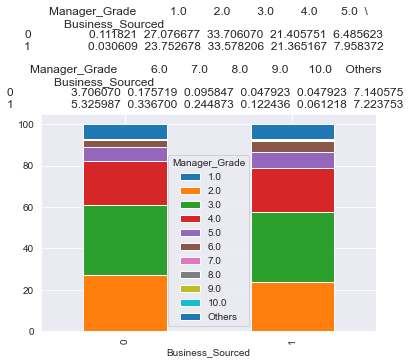

In [526]:
BVA_categorical_plot(df, 'Manager_Grade', 'Business_Sourced')

### Result:
* Grade 2 maangers are more likely to be convert applicants into agents)

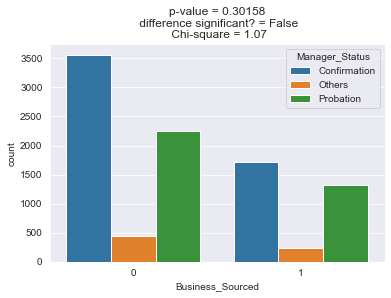

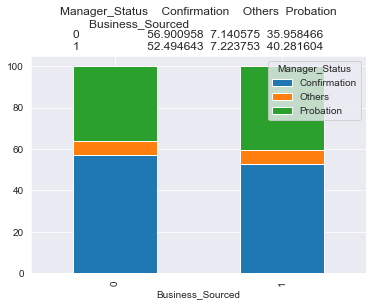

In [527]:
BVA_categorical_plot(df, 'Manager_Status', 'Business_Sourced')

### Result:
* Managers who are on confirmed are more likely to convert the applicant to target

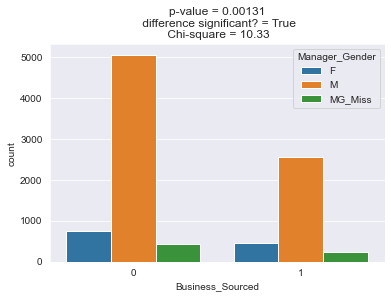

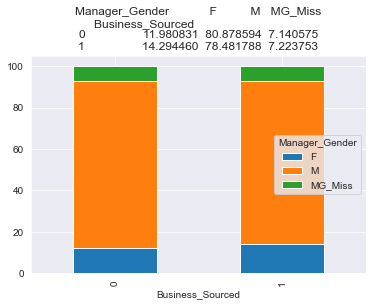

In [528]:
BVA_categorical_plot(df, 'Manager_Gender', 'Business_Sourced')

### Result:
* Male Manger are more likely to convert the applicant to agents

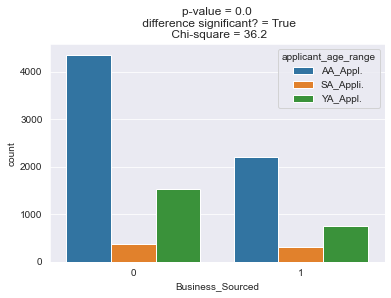

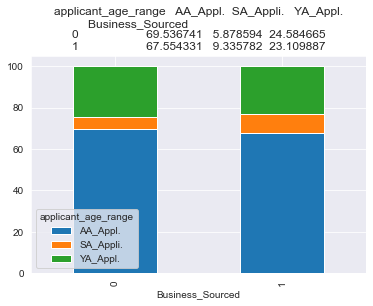

In [529]:
BVA_categorical_plot(df, 'applicant_age_range', 'Business_Sourced')

### Result:
* Applicant who are in between 25 and 50 are more likely to be agents

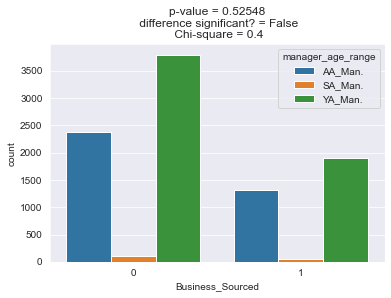

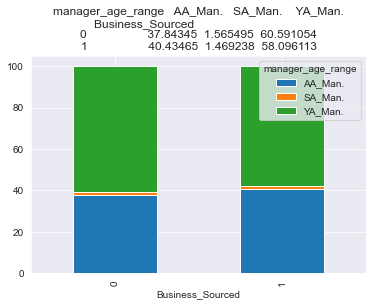

In [530]:
BVA_categorical_plot(df, 'manager_age_range', 'Business_Sourced')

### Result:
* young age manager are more likely to convert applicant to agents

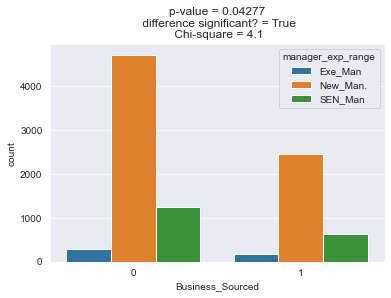

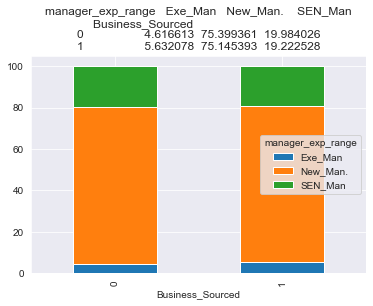

In [531]:
BVA_categorical_plot(df, 'manager_exp_range', 'Business_Sourced')

### Result:
* Managers who have experience less than 2 years of experience are more likely to convert applicant into agents

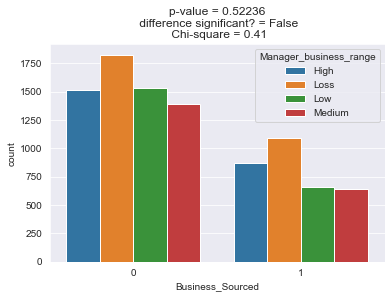

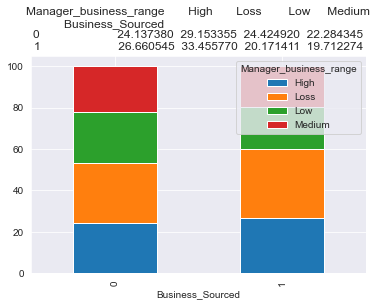

In [532]:
BVA_categorical_plot(df, 'Manager_business_range', 'Business_Sourced')

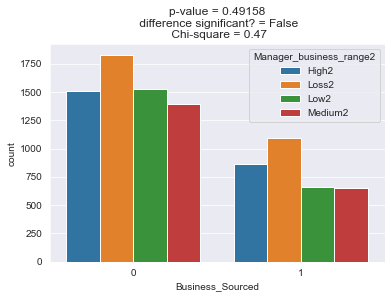

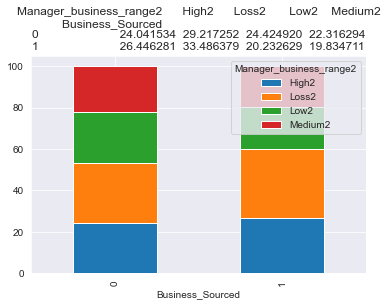

In [533]:
BVA_categorical_plot(df, 'Manager_business_range2', 'Business_Sourced')

### categorical - numerical

In [534]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

In [535]:
df.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Num_Products            float64
Manager_Num_Products2           float64
Business_Sourced               category
applicant_age_range            category
manager_age_range              category
manager_exp_range              category
Manager_business_range         category
Manager_business_range2        category
dtype: object

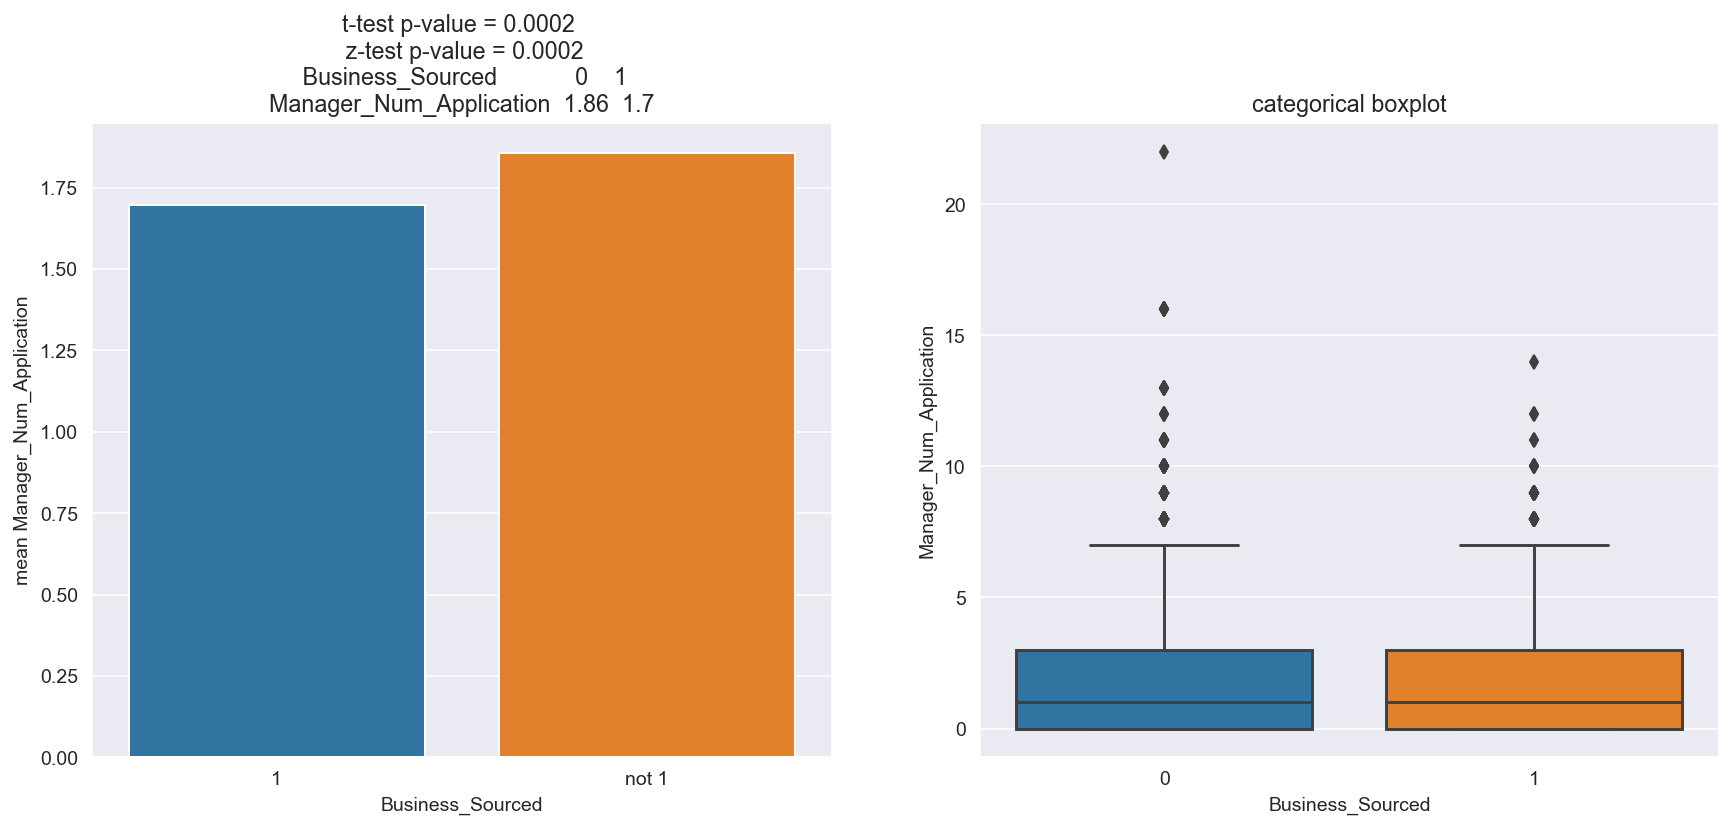

In [536]:
Bivariate_cont_cat(df, 'Manager_Num_Application', 'Business_Sourced', 1)

### Result:
* Managers who have more number of application are

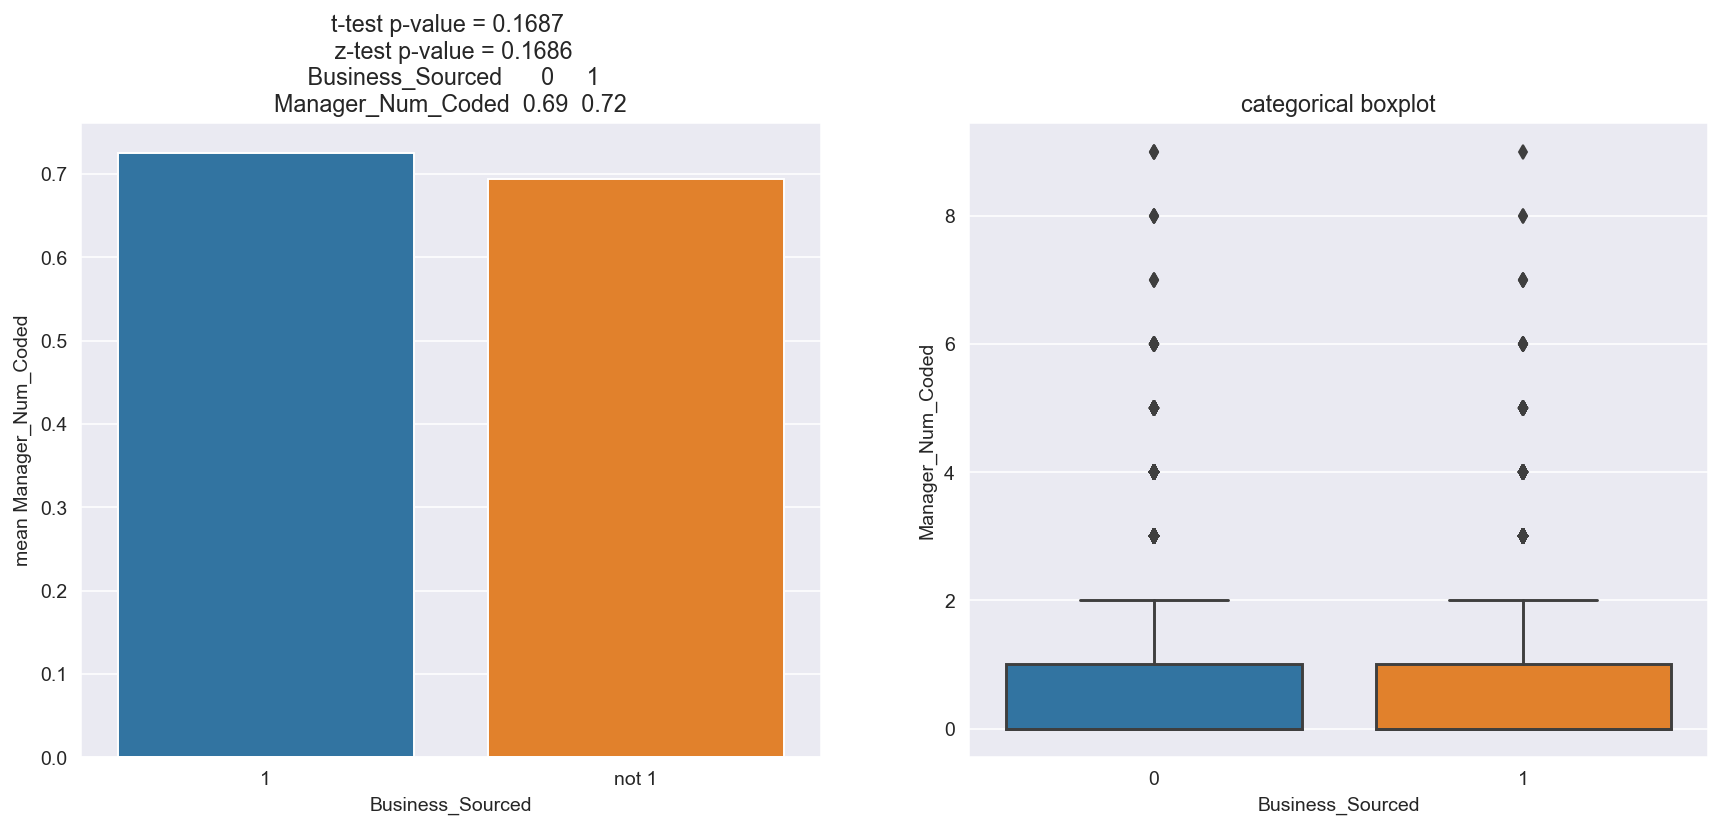

In [537]:
Bivariate_cont_cat(df, 'Manager_Num_Coded', 'Business_Sourced', 1)

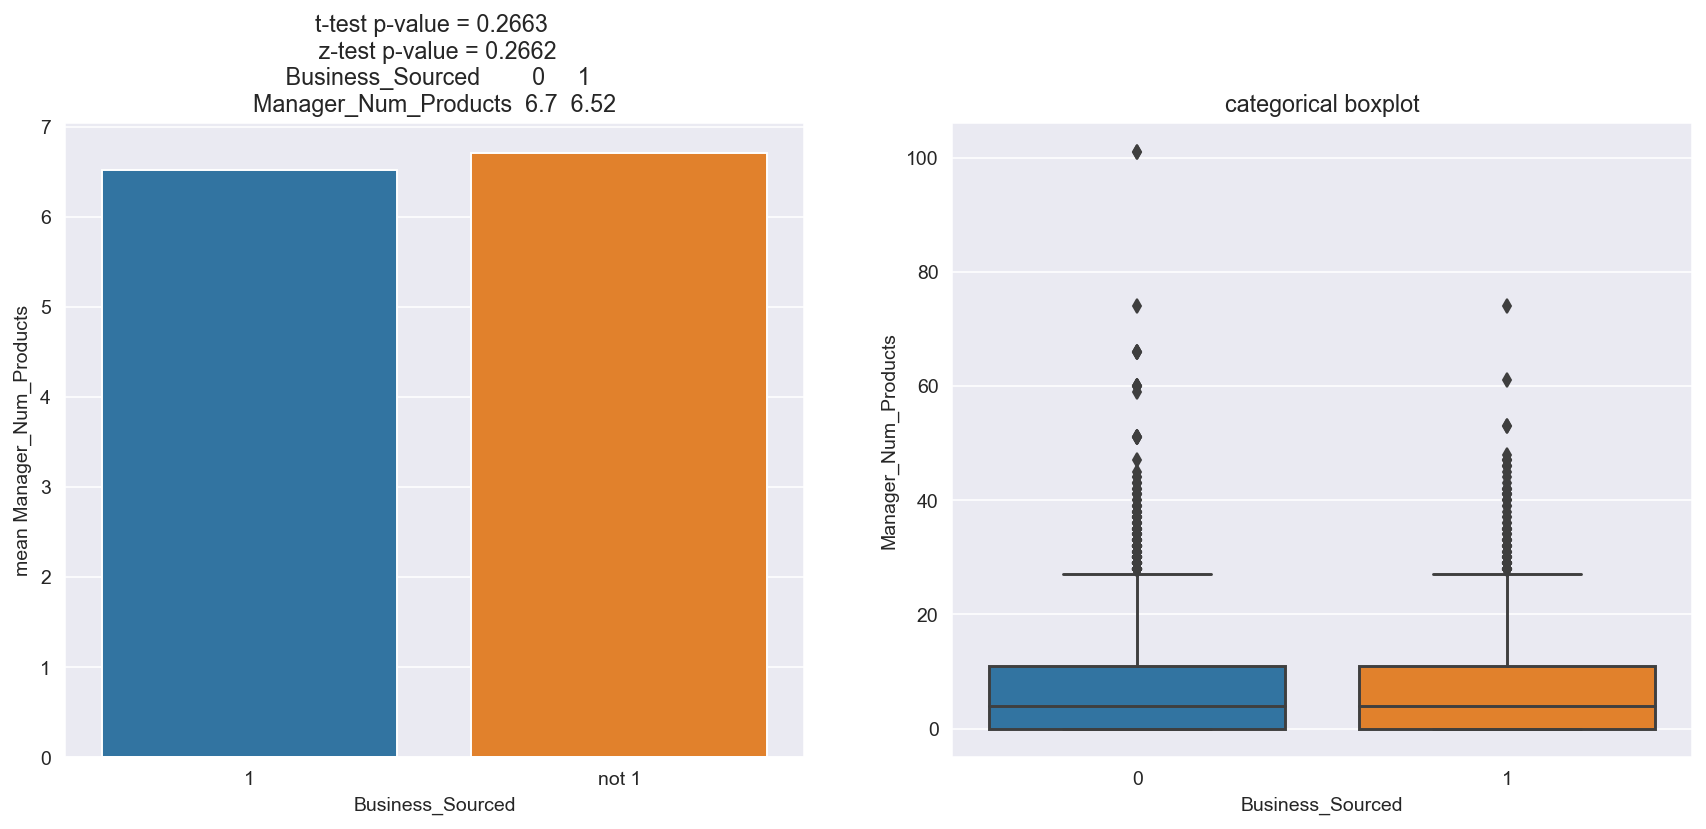

In [538]:
Bivariate_cont_cat(df, 'Manager_Num_Products', 'Business_Sourced', 1)

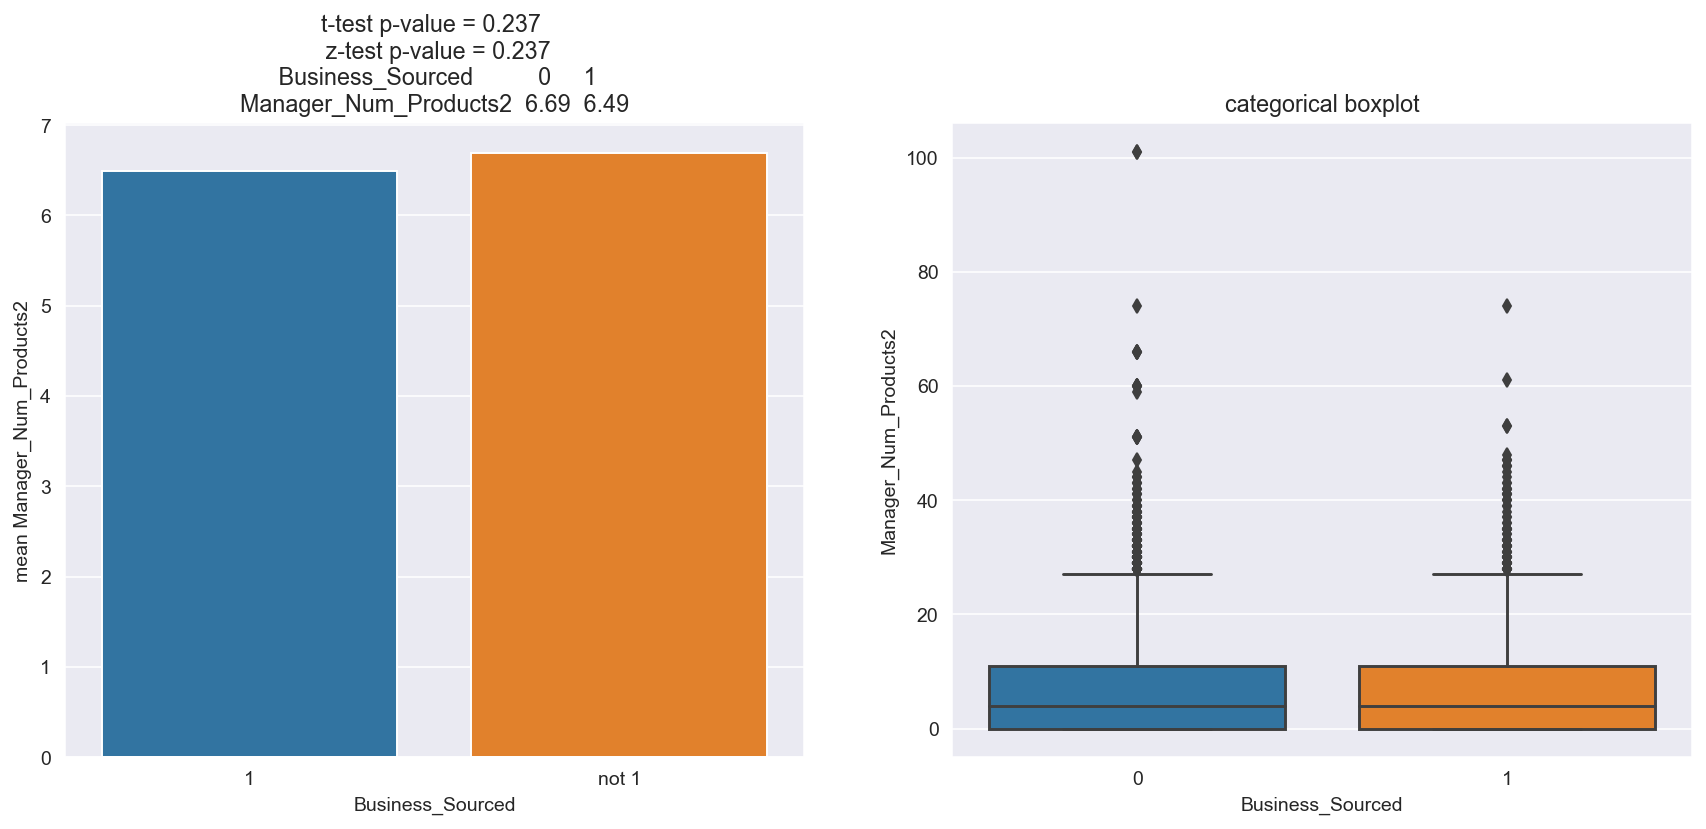

In [539]:
Bivariate_cont_cat(df, 'Manager_Num_Products2', 'Business_Sourced', 1)

## Multivariate Analysis

In [540]:
df.head()

,ID,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Num_Products,Manager_Num_Products2,Business_Sourced,applicant_age_range,manager_age_range,manager_exp_range,Manager_business_range,Manager_business_range2
0,FIN1000001,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,28.0,28.0,0,AA_Appl.,YA_Man.,New_Man.,High,High2
1,FIN1000002,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,28.0,28.0,1,YA_Appl.,YA_Man.,New_Man.,High,High2
2,FIN1000003,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,24.0,24.0,0,AA_Appl.,AA_Man.,New_Man.,High,High2
3,FIN1000004,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,22.0,22.0,0,YA_Appl.,YA_Man.,SEN_Man,High,High2
4,FIN1000005,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,17.0,17.0,0,YA_Appl.,AA_Man.,New_Man.,Medium,Medium2


In [545]:
df.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Num_Products            float64
Manager_Num_Products2           float64
Business_Sourced               category
applicant_age_range            category
manager_age_range              category
manager_exp_range              category
Manager_business_range         category
Manager_business_range2        category
Target                            int64
dtype: object

In [541]:
df['Target'] = 0
df['Target'][(df['Business_Sourced']== 1)] = 1
df['Target'][(df['Business_Sourced']!= 1)] = 0

In [542]:
print(df['Target'].value_counts() ,'\n\n', df['Business_Sourced'].value_counts())

0    6260
1    3267
Name: Target, dtype: int64 

 0    6260
1    3267
Name: Business_Sourced, dtype: int64


In [551]:
GAC = df.pivot_table('Target',['Applicant_Gender', 'applicant_age_range'], 'Applicant_Occupation', aggfunc='sum')
GAC

Applicant_Occupation                  Business  Others  Salaried  \
Applicant_Gender applicant_age_range                               
AG_Miss          AA_Appl.                    0       0         0   
                 SA_Appli.                   0       0         0   
                 YA_Appl.                    0       0         0   
F                AA_Appl.                   80     233       253   
                 SA_Appli.                   5      31        33   
                 YA_Appl.                   37      93        89   
M                AA_Appl.                  493     517       625   
                 SA_Appli.                  39      89       108   
                 YA_Appl.                  121     149       223   

Applicant_Occupation                  Self Employed  Student  
Applicant_Gender applicant_age_range                          
AG_Miss          AA_Appl.                         0        0  
                 SA_Appli.                        0        0  
                 YA_Appl.                         0        0  
F                AA_Appl.                         0        3  
                 SA_Appli.                        0        0  
                 YA_Appl.                         0       22  
M                AA_Appl.                         0        3  
                 SA_Appli.                        0        0  
                 YA_Appl.                         0       21

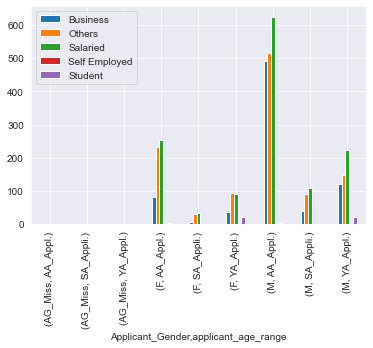

In [552]:
GAC.plot(kind=  'bar').legend()
plt.legend()

In [569]:
GA = df.pivot_table('Target',['manager_age_range', 'manager_exp_range'], 'Manager_Status', aggfunc='sum')
GA

Manager_Status                       Confirmation  Others  Probation
manager_age_range manager_exp_range                                 
AA_Man.           Exe_Man                     106       0          0
                  New_Man.                    446       0        380
                  SEN_Man                     389       0          0
SA_Man.           Exe_Man                       0       0          0
                  New_Man.                     33       0          0
                  SEN_Man                      15       0          0
YA_Man.           Exe_Man                      78       0          0
                  New_Man.                    424     236        936
                  SEN_Man                     224       0          0

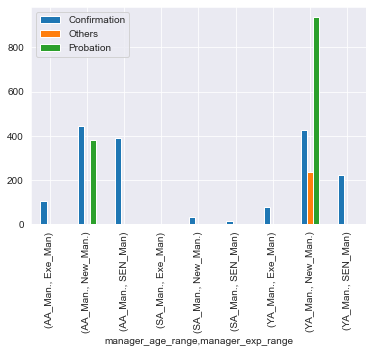

In [570]:
GA.plot(kind=  'bar').legend()
plt.legend()

In [568]:
GA2 = df.pivot_table('Target', ['Manager_Joining_Designation', 'Manager_Current_Designation'],'Manager_Gender' aggfunc='sum')
GA2

SyntaxError: invalid syntax (<ipython-input-568-e518cba439e4>, line 1)

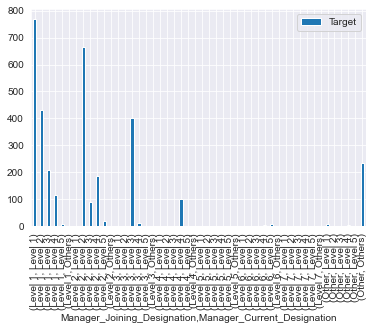

In [566]:
GA2.plot(kind=  'bar').legend()
plt.legend()